Ayan Shaikh

Diabeties Prediction

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Load the dataset as CSV
file_path = '/content/diabetes.csv.xls'
df = pd.read_csv(file_path)


In [10]:
# Data preprocessing
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.nan)
    df[column] = df[column].fillna(df[column].median())


In [11]:
# Feature scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [15]:
# Evaluate Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_class_report = classification_report(y_test, y_pred_logreg)

In [16]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [17]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)


In [18]:
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Logistic Regression Classification Report:\n", logreg_class_report)
print("Random Forest Classification Report:\n", rf_class_report)

Logistic Regression Accuracy: 0.7402597402597403
Random Forest Accuracy: 0.7489177489177489
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



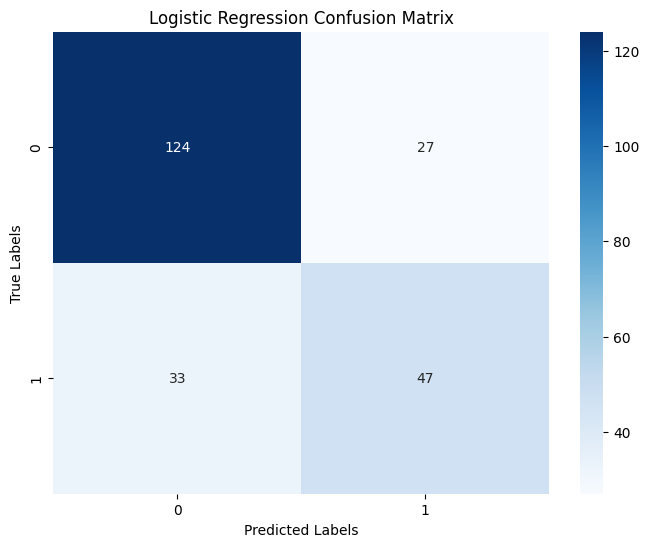

In [19]:
# Plot Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


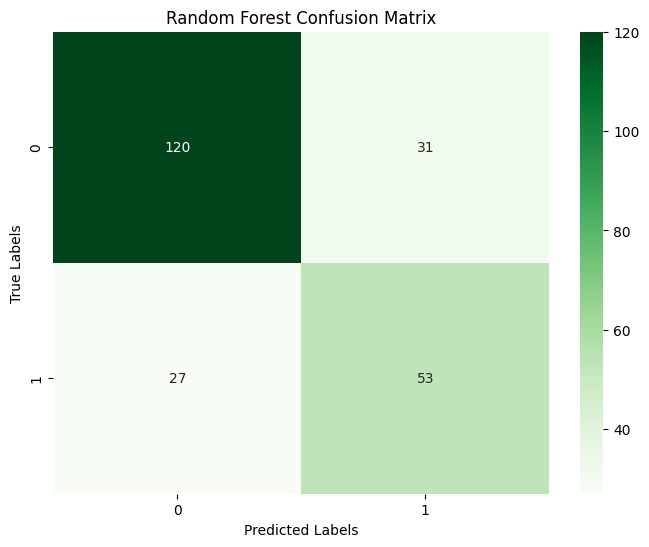

In [20]:
# Plot Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [3]:
import pickle

# Save the model to a file
with open('diabetes_rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print(f"Model saved as {model_filename}")

In [4]:
# Load the model
with open('diabetes_rf_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [5]:
# Prediction function
def predict_diabetes(input_features):
    """
    Predict if a person has diabetes based on input features.

    Parameters:
    input_features (list): A list of features in the following order:
                           [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

    Returns:
    str: 'Diabetes' or 'No Diabetes'
    """
    # Transform the input features
    input_features_scaled = scaler.transform([input_features])

    # Predict
    prediction = model.predict(input_features_scaled)

    # Return the prediction
    if prediction[0] == 1:
        return 'Diabetes'
    else:
        return 'No Diabetes'

Example
If you want to predict for a person with the following features:
<br><br>
**Pregnancies:** 2<br>
**Glucose:** 120<br>
**Blood Pressure:** 80<br>
**Skin Thickness:** 20<br>
**Insulin:** 0<br>
**BMI:** 32.4<br>
**Diabetes Pedigree Function:** 0.627<br>
**Age:** 50

In [7]:
# Example usage
input_features = [2, 120, 80, 20, 0, 32.4, 0.627, 50]
result = predict_diabetes(input_features)
print(f"Prediction: {result}")

Prediction: No Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
